In [ ]:
%run ./State_preparation_final.ipynb

In [3]:
def transfo(values):
    """Helper function to write the tests input vectors"""
    res=[]
    test_norm = 0
    if len(values) == 1:
        values.append([0,0])
    for _ in range(2**(math.ceil(math.log(len(values),2)))-len(values)):
        values.append([0,0])
    for el in values :
        res.append(np.sign(el[0])*np.sqrt(abs(el[0]))+
                  np.sign(el[1])*np.sqrt(abs(el[1]))*1j) 
        test_norm += abs(el[0])+abs(el[1])
    if test_norm!=1 :
        print("Vector is not normalized, norm is :",test_norm)
        print("Renormalizing ...\n")
        return list(np.array(res)/np.sqrt(test_norm))
    else:
        print("Vector is normalized\n")
        return res

Vector is not normalized, norm is : 2.0
Renormalizing ...



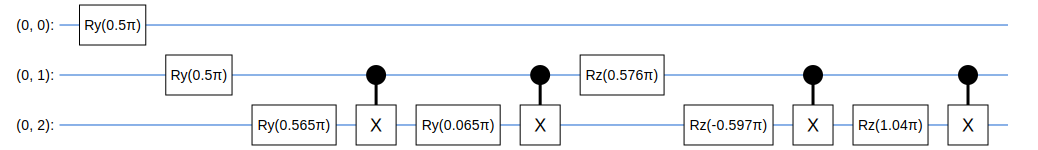

In [11]:
amplitudes = [[-0.08,-0.07],[0.1,-0.25],[-0.2,0.05],[-0.15,-0.1],[-0.08,-0.07],[0.1,-0.25],[-0.2,0.05],[-0.15,-0.1]]
#amplitudes = [[-1,0]]
i_vec = transfo(amplitudes)
N = len(i_vec)
qubits = cirq.GridQubit.rect(1,math.ceil(math.log(N,2)))
circuit = gen_circuit_encodding(i_vec,qubits)
SVGCircuit(circuit)

In [58]:
sim = cirq.Simulator()
res = sim.simulate(circuit)
print_decimal_nb = 3
pr_help = 10**print_decimal_nb
global_phase_resolved = [el * np.exp(-1j*(np.angle(res.final_state_vector[0])-np.angle(i_vec[0]))) for el in res.final_state_vector]
print("Initial vector :  ",[int(np.real(x)*pr_help)/pr_help + int(np.imag(x)*pr_help)/pr_help*1j for x in i_vec])
print("Simulated output :",[int(np.real(x)*pr_help)/pr_help + int(np.imag(x)*pr_help)/pr_help*1j for x in global_phase_resolved])

error_threshold_exp = 7
er_help = 10**error_threshold_exp
error = [int(np.real(inp-out)*er_help)/er_help + int(np.imag(inp-out)*er_help)/er_help for inp,out in zip(i_vec,global_phase_resolved)]
squarred_error = sum([np.abs(inp-out)**2 for inp,out in zip(i_vec,global_phase_resolved)])
print("Error by basis vector :", error)
print("Squared error :",squarred_error)

Initial vector :   [(-0.138-0.129j), (0.188-0.243j), (-0.218+0.109j), (-0.188-0.154j), (-0.138-0.129j), (0.188-0.243j), (-0.218+0.109j), (-0.188-0.154j), (-0.138-0.129j), (0.188-0.243j), (-0.218+0.109j), (-0.188-0.154j), (-0.138-0.129j), (0.188-0.243j), (-0.218+0.109j), (-0.188-0.154j)]
Simulated output : [(-0.138-0.129j), (0.188-0.243j), (-0.218+0.109j), (-0.188-0.154j), (-0.138-0.129j), (0.188-0.243j), (-0.218+0.109j), (-0.188-0.154j), (-0.138-0.129j), (0.188-0.243j), (-0.218+0.109j), (-0.188-0.154j), (-0.138-0.129j), (0.188-0.243j), (-0.218+0.109j), (-0.188-0.154j)]
Error by basis vector : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Squared error : 2.1557767285468557e-14
